![]()
# Inteligencia Artificial
## Arboles de decisión Dataset TITANIC

## Nombre docente
### Jose Gabriel Rodriguez Rivas

## Nombre del Alumno
### Roque Emilio Alvarez Delgado

### Aspectos básicos/situación
En esta práctica de laboratorio creará un clasificador de árbol de decisiones que funcione con un conjunto de datos que contenga detalles sobre los más de 1300 pasajeros que estaban a bordo del trasatlántico Titanic durante su trágico primer viaje.

Con los datos de arriba, ¿qué tipos de preguntas podemos hacer acerca de los factores que contribuyeron a que los pasajeros sobrevivan o fallecieran en la catástrofe del Titanic?
**Respuesta:** Influye la clase del boleto que tenia el pasajero?, ¿el ser hombre o mujer influye? ,¿Que edades tenian mayor prioridad a la hora de evacuar?

In [1]:
#Code cell 1
#import pandas
import pandas as pd

#create a pandas dataframe called "training" from the titanic-train.csv file
training = pd.read_csv("./Data/titanic-train.csv")

In [2]:
#Code cell 2
#verify the contents of the training dataframe using the pandas info() method.
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  915 non-null    int64  
 1   Survived     915 non-null    int64  
 2   Pclass       915 non-null    int64  
 3   Name         915 non-null    object 
 4   Gender       915 non-null    object 
 5   Age          738 non-null    float64
 6   SibSp        915 non-null    int64  
 7   Parch        915 non-null    int64  
 8   Ticket       915 non-null    object 
 9   Fare         915 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     914 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 85.9+ KB


¿Faltan valores en el conjunto de datos?

**Respuesta** Sí faltan en los atributos de Cabin, Age, Embarked     

In [3]:
#Code cell 3
#view the first few rows of the data
training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S


### Paso 2: Preparar los datos para el modelo de árbol de decisiones

In [4]:
#code cell 4
training["Gender"] = training["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [5]:
#Code cell 3
#view the first few rows of the data
training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",0,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.0,0,0,7553,9.8375,NaN,S


In [6]:
#code cell 6
training["Age"].fillna(training["Age"].mean(), inplace=True)

In [7]:
#code cell 7
#verify that the missing values for the age variable have been eliminated
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  915 non-null    int64  
 1   Survived     915 non-null    int64  
 2   Pclass       915 non-null    int64  
 3   Name         915 non-null    object 
 4   Gender       915 non-null    int64  
 5   Age          915 non-null    float64
 6   SibSp        915 non-null    int64  
 7   Parch        915 non-null    int64  
 8   Ticket       915 non-null    object 
 9   Fare         915 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     914 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 85.9+ KB


¿Cuál es el valor que se utilizó para reemplazar a las edades faltantes?
**training["Age"].mean()**
**29.970867208672033**

In [8]:
training["Age"].mean()

29.970867208672033

In [9]:
#code cell 8
#create the array for the target values
y_target = training["Survived"].values

In [10]:
#code cell 9
columns = ["Fare", "Pclass", "Gender", "Age", "SibSp"]
#create the variable to hold the features that the classifier will use
X_input = training[list(columns)].values

#### Modelo Programado

In [11]:
#code cell 10
#import the tree module from the sklearn library
from sklearn import tree

#create clf_train as a decision tree classifier object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#train the model using the fit() method of the decision tree object. 
#Supply the method with the input variable X_input and the target variable y_target
clf_train = clf_train.fit(X_input, y_target)

In [12]:
#code cell 11
clf_train.score(X_input,y_target)

0.8163934426229508

### Paso 6: Visualizar el árbol

In [13]:
#code cell 12
#from sklearn.externals.six import StringIO
with open("./Data/titanic.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns)

In [14]:
#code cell 13
#run the Graphviz dot command to convert the .dot file to .png
!dot -Tpng ./Data/titanic.dot -o ./Data/titanic.png

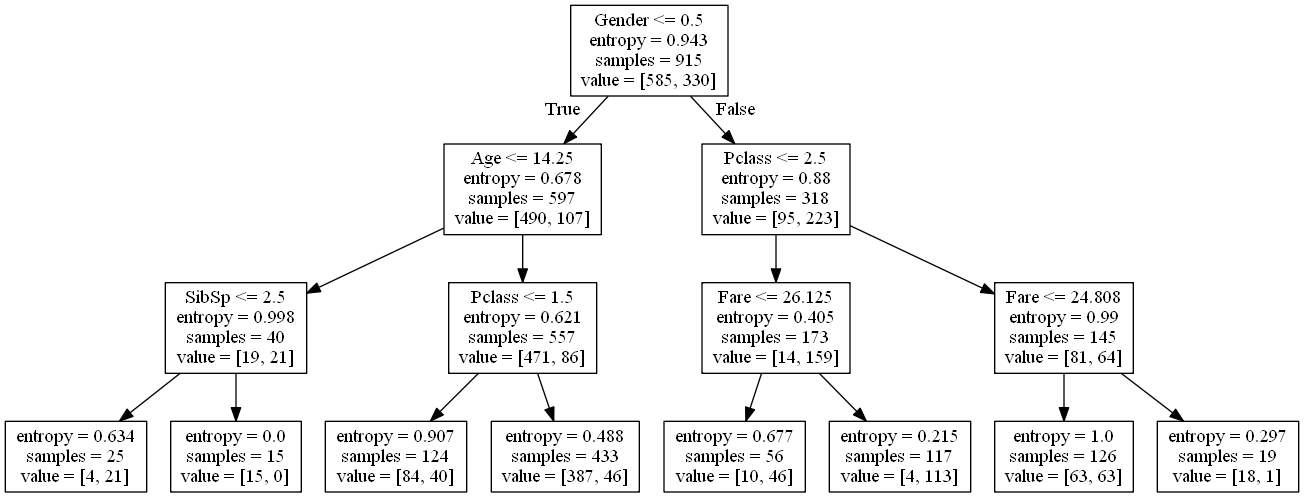

In [15]:
#code cell 14
#import the Image module from the Ipython.display libary
from IPython.display import Image

#display the decison tree graphic
Image("./Data/titanic.png")

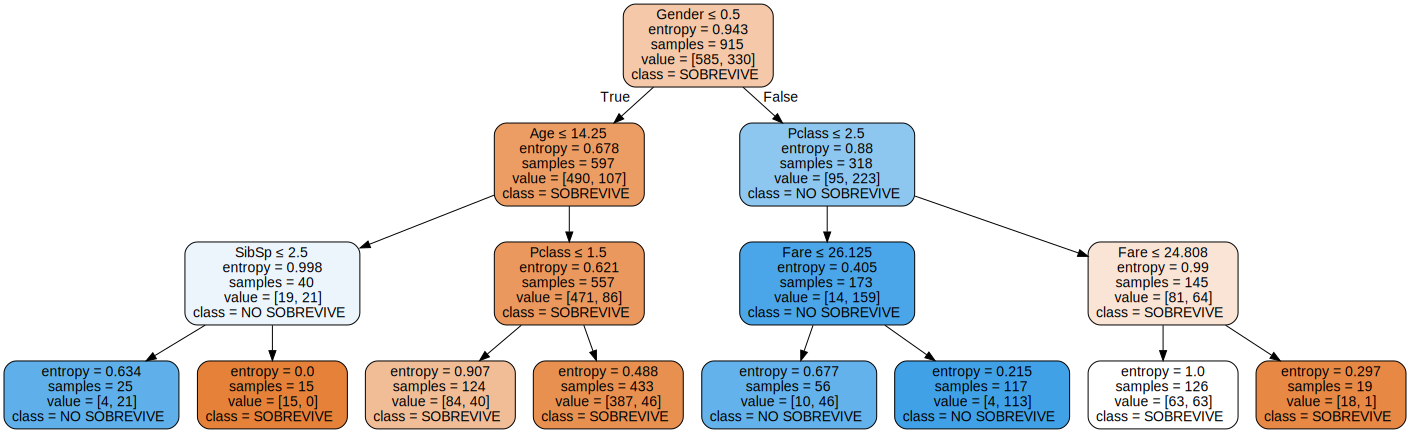

In [16]:
clasificacion=['SOBREVIVE','NO SOBREVIVE']
import sklearn
with open("./Data/titanic.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns, class_names=clasificacion)
import graphviz
dot_data= tree.export_graphviz(clf_train,out_file=None,
                               class_names=clasificacion,
                              feature_names=columns, filled=True,
                              rounded=True, special_characters=True)
graph= graphviz.Source(dot_data)
graph.render("titanicColor", format='png')
graph

¿Qué describe al grupo que tenía mayor cantidad de víctimas fatales? ¿Qué grupo tenía la mayor cantidad de sobrevivientes?

**Respuesta:**<br>
**el grupo de mas sobrevivientes fue el que tiene las siguiente caracteristicas:**
* gender = female
* Age > 14.25
* PClass > 1.5
<br>

**el grupo de mayor victimas fue el que tiene las siguiente caracteristicas:**

* gender = male
* Fare > 26.125
* PClass <= 2.5

### INTERPRETACION DE ARBOL
A continuacion se presentan los atributos de los grupos mas grandes de sobrevivientes y victimas<br>
**el grupo de mas sobrevivientes fue el que tiene las siguiente caracteristicas:**
* gender = female
* Age > 14.25
* PClass > 1.5
<br>

**el grupo de mayor victimas fue el que tiene las siguiente caracteristicas:**

* gender = male
* Fare > 26.125
* PClass <= 2.5

## Parte 2: Aplicar el modelo del árbol de decisiones

#### Paso 1: Importar y elaborar los datos

In [17]:
#code cell 15
#import the file into the 'testing' dataframe.
testing = pd.read_csv("./Data/titanic-test.csv")
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  393 non-null    int64  
 1   Survived     393 non-null    int64  
 2   Pclass       393 non-null    int64  
 3   Name         393 non-null    object 
 4   Gender       393 non-null    object 
 5   Age          307 non-null    float64
 6   SibSp        393 non-null    int64  
 7   Parch        393 non-null    int64  
 8   Ticket       393 non-null    object 
 9   Fare         393 non-null    float64
 10  Cabin        93 non-null     object 
 11  Embarked     392 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 37.0+ KB


¿Cuántos registros hay en el conjunto de datos?

**Respuesta** 393

¿Qué variable(s) importante(s) son valores faltantes y cuántas faltan?

**Respuesta:** Age y faltan 86
                Cabin faltan 300

In [18]:
#code cell 16
#replace the Gender labels in the testing dataframe
testing["Gender"] = testing["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [19]:
#code cell 17
#Use the fillna method of the testing dataframe column "Age" 
#to replace missing values with the mean of the age values.
testing["Age"].fillna(testing["Age"].mean(), inplace=True)

#### Paso 2: Etiquetar el conjunto de datos de prueba

In [20]:
#code cell 19
#create the variable X_input to hold the features that the classifier will use
X_input = testing[list(columns)].values

In [21]:
#code cell 20
#apply the model to the testing data and store the result in a pandas dataframe.
#Use X_input as the argurment for the predict() method of the clf_train classifier object

target_labels = clf_train.predict(X_input)

#convert the target array into a pandas dataframe using the pd.DataFrame() method and target as argument
target_labels = pd.DataFrame({'Est_Survival':target_labels, 'Name':testing['Name']})

#display the first few rows of the data set

In [22]:
#code cell 21
#import the numpy library as np
import numpy as np
# Load data for all passengers in the variable all_data
all_data = pd.read_csv("./Data/titanic_all.csv")
# Merging using the field Name as key, selects only the rows of the two datasets that refer to the same passenger
testing_results = pd.merge(target_labels, all_data[['Name','Survived']], on=['Name'])

# Compute the accuracy as a ratio of matching observations to total osbervations. Store this in in the variable acc.
acc = np.sum(testing_results['Est_Survival'] == testing_results['Survived']) / float(len(testing_results))
# Print the resul
acc

0.7588832487309645

## Parte 3: Evaluar el modelo del árbol de decisiones

#### Paso 1: Importar los datos

In [23]:
#code cell 22
#import the titanic_all.csv file into a dataframe called all_data. Specify the list of columns to import.
all_data = pd.read_csv("./Data/titanic_all.csv", usecols=['Survived','Pclass','Gender','Age','SibSp','Fare'])
#View info for the new dataframe
all_data.info

<bound method DataFrame.info of       Survived  Pclass  Gender      Age  SibSp      Fare
0            1       1  female  29.0000      0  211.3375
1            1       1    male   0.9167      1  151.5500
2            0       1  female   2.0000      1  151.5500
3            0       1    male  30.0000      1  151.5500
4            0       1  female  25.0000      1  151.5500
...        ...     ...     ...      ...    ...       ...
1303         0       3  female  14.5000      1   14.4542
1304         0       3  female      NaN      1   14.4542
1305         0       3    male  26.5000      0    7.2250
1306         0       3    male  27.0000      0    7.2250
1307         0       3    male  29.0000      0    7.8750

[1308 rows x 6 columns]>

¿Cuántos registros hay en el conjunto de datos?

**Respuesta** 393

¿Qué variable(s) importante(s) son valores faltantes y cuántas faltan?

**Respuesta:** Age y faltan 86 Cabin faltan 300


####  Paso 2: Explicar los datos.

In [24]:
#code cell 4
all_data["Gender"] = all_data["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [25]:
all_data["Age"].fillna(all_data["Age"].mean(), inplace=True)

In [26]:
all_data.head()

,Survived,Pclass,Gender,Age,SibSp,Fare
0,1,1,1,29.0000,0,211.3375
1,1,1,0,0.9167,1,151.5500
2,0,1,1,2.0000,1,151.5500
3,0,1,0,30.0000,1,151.5500
4,0,1,1,25.0000,1,151.5500


#### Paso 2: Crear las variables de entradas y salida para el conjunto de datos de entrenamiento y prueba

In [27]:
#code cell 25
#Import train_test_split() from the sklearn.model_selection libary 
from sklearn.model_selection import train_test_split

#create the input and target variables as uppercase X and lowercase y. Reuse the columns variable.
X = all_data[list(columns)].values
y = all_data["Survived"].values

#generate the four testing and training data arrays with the train_test_split() method
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.40, random_state=0)

In [28]:
type(X_train)

numpy.ndarray

In [29]:
#code cell 26
#create the training decision tree object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#fit the training model using the input and target variables
clf_train = clf_train.fit(X_train, y_train)

In [30]:
#code cell 27
#score the model on the two datasets and store the scores in variables. Convert the scores to strings using str()
train_score = str(clf_train.score(X_train,y_train))
test_score = str(clf_train.score(X_test,y_test))

#output the values in a test string
print('Training score = '+ train_score+' Testing score = '+test_score)

Training score = 0.8201530612244898 Testing score = 0.8053435114503816


### TAREA: Parte 4 para estudio adicional (opcional)
**Si tiene tiempo y le interesa, puede intentar lo siguiente y ver cómo el árbol de decisiones se ve afectado.**

In [31]:
training2 = pd.read_csv("./Data/titanic-train.csv")
training2["Gender"] = training2["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)
training2

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",0,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.0,0,0,7553,9.8375,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
910,911,0,3,"Baccos, Mr. Raffull",0,20.0,0,0,2679,7.2250,NaN,C
911,912,0,1,"Smith, Mr. Richard William",0,NaN,0,0,113056,26.0000,A19,S
912,913,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
913,914,0,3,"Johnson, Mr. Alfred",0,49.0,0,0,LINE,0.0000,NaN,S


In [32]:
training2.dropna(subset=['Age'],inplace=True)
training2

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.0,0,0,7553,9.8375,NaN,S
5,6,0,2,"Bowenur, Mr. Solomon",0,42.0,0,0,211535,13.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
907,908,0,2,"Fillbrook, Mr. Joseph Charles",0,18.0,0,0,C.A. 15185,10.5000,NaN,S
909,910,0,3,"Crease, Mr. Ernest James",0,19.0,0,0,S.P. 3464,8.1583,NaN,S
910,911,0,3,"Baccos, Mr. Raffull",0,20.0,0,0,2679,7.2250,NaN,C
912,913,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S


In [33]:
#code cell 8
#create the array for the target values
y_target = training2["Survived"].values
#code cell 9
columns = ["Fare", "Pclass", "Gender", "Age", "SibSp"]
#create the variable to hold the features that the classifier will use
X_input = training2[list(columns)].values
#code cell 10
#create clf_train as a decision tree classifier object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#train the model using the fit() method of the decision tree object. 
#Supply the method with the input variable X_input and the target variable y_target
clf_train = clf_train.fit(X_input, y_target)
#code cell 11
clf_train.score(X_input,y_target)

0.8252032520325203

In [34]:
#code cell 13
#run the Graphviz dot command to convert the .dot file to .png
!dot -Tpng ./Data/titanic.dot -o ./Data/titanic2.png

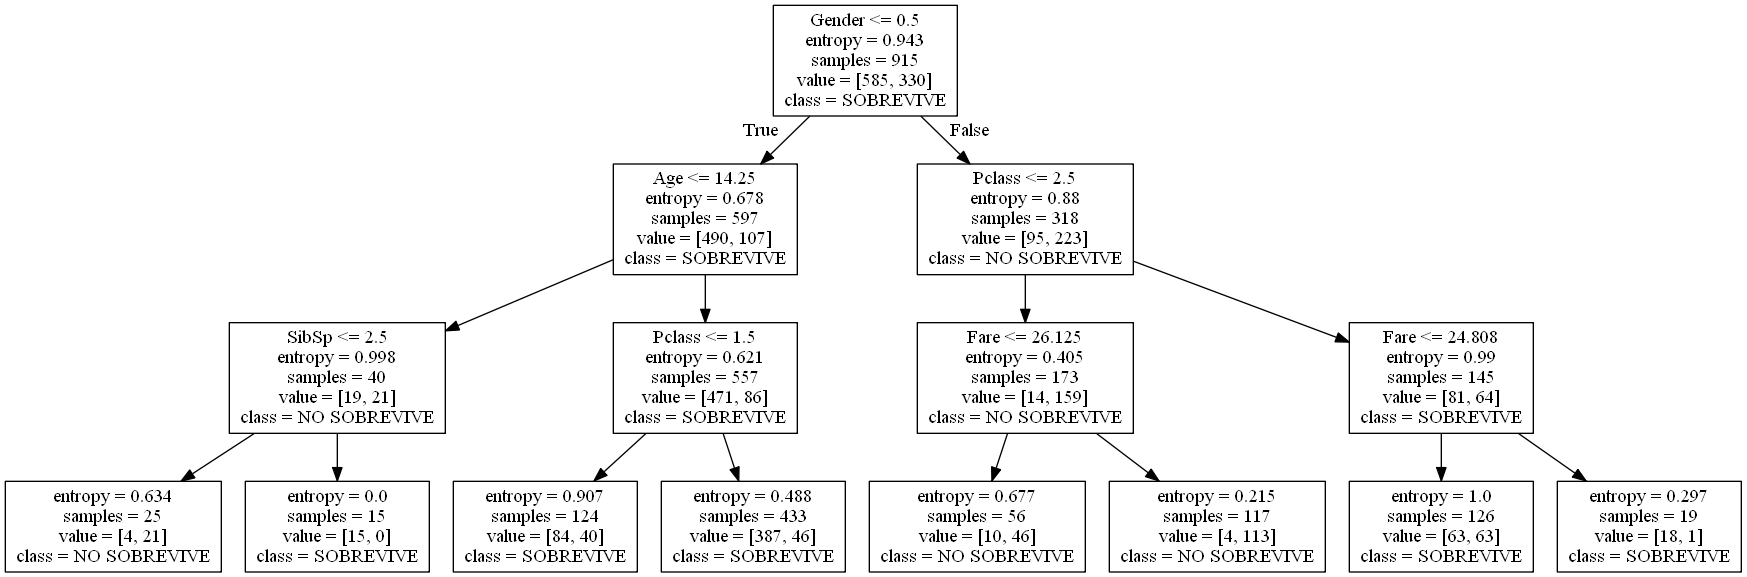

In [35]:
Image("./Data/titanic2.png")

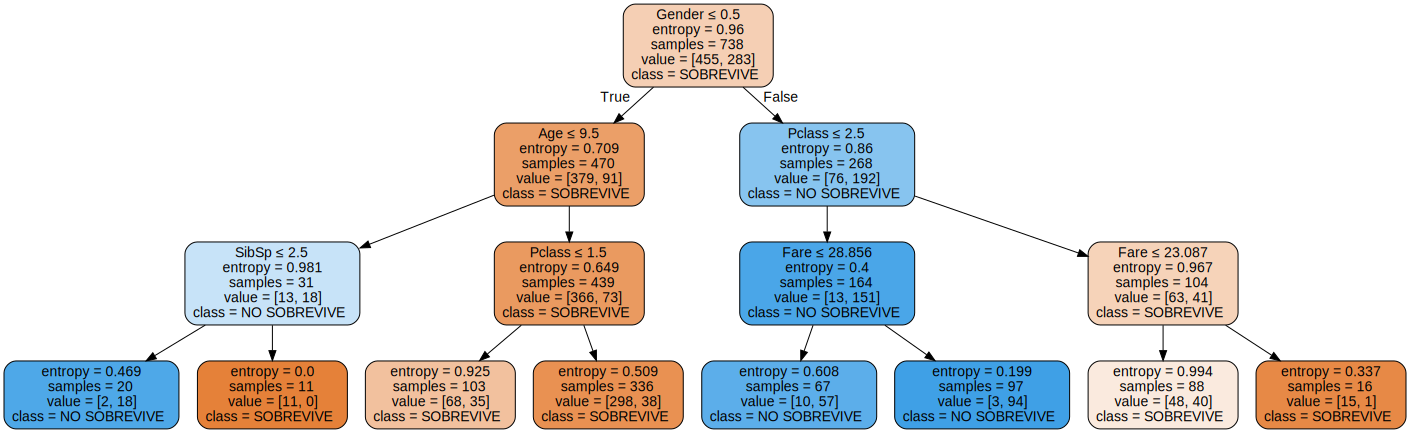

In [36]:
clasificacion=['SOBREVIVE','NO SOBREVIVE']
import sklearn
with open("titanic.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns, class_names=clasificacion)
import graphviz
dot_data= tree.export_graphviz(clf_train,out_file=None,
                               class_names=clasificacion,
                              feature_names=columns, filled=True,
                              rounded=True, special_characters=True)
graph= graphviz.Source(dot_data)
graph.render("covidColor", format='png')
graph

# Reflexión
Diferencias obtenidas eliminando los valores nulos de la edad
1. **¿Fue efectivo? ¿Por qué?** El más efectivo fue en el que se eliminaron los datos porque al eliminar los datos no conocidos no se altera en nada la funcion ya que si dejamos valores nulos esos valores seran tomados en cuenta y y al no ser datos certeros modifican la fiabilidad del algoritmo.
2. **¿Qué porcentaje se obtuvo?** El primer arbol tomando valores nulos se obtuvo un porcentaje de 75.88% acertividad y en sin tomas valores nuloes se obtuvo un valor de 82.52% de acertividad
3. **Conclusiones generales** Se tiene una mejor acertividad eliminando valores nulos en este tipo de  algoritmos.